<a href="https://colab.research.google.com/github/majidshaik/Data-Science-Learning/blob/master/src/statistics/DSL_Lesson_1_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Probability of Multiple Events Occuring**
**Independent Events**

> Event A : Man [probability = 50%]   
Event B : Elderly [probability = 25%]

Probability of A and B =  P(A and B) = P(A) * P(B) 
* .5 * .25 = 0.125 = 12.5%

Probability of A or B = P(A or B) = P(A) + P(B) - P(A and B)
* .5 + .25 - .125 = .625 = 62.5%



**Conditional Events**  
If we can guarantee event B occurrs, then the probability "A given B" is the same as assuming they both occur simultaneously relative to the probability of B:  
> Probability of the person being a Man, given that we know they are Elderly:  

![alt text](https://drive.google.com/uc?id=1qL1uORHTUxf8CdrhXpLcdRzl_hh0t5_1)

**Conditional Events - *Bayesian Method***   
In some situations, we are missing the necessary data... such as P(B), without which you couldn't solve the above equation...

Bayes discovered the following:
P(B) \* P(A|B) = P(A) \* P(B|A)

So, the probability of A given B =  
![P(A|B)](https://drive.google.com/uc?id=1XoQbr1qAkdd-VdxONCh2hAef1n-jFNjC)  


A derived form of the equation allows us to solve the probability without ever having P(B):
![P(A|B)](https://drive.google.com/uc?id=1D_GNKcdDA8tuaA1pd1EHA-fkPLZxJHt0)  
(Where the A^c is the complement of A)  
P(A^c) = 1 - P(A)

## **Real-World Example**


> **Molecular diagnostic test for cancer**  
* P(C) = Patient has cancer  
* P(Tp) = Patient tests positive for cancer    

![Diagnostic Test](https://drive.google.com/uc?id=1aLKjwweXnKmrjHKbVWgn02Vi4YOBzdok)  
> *What percentage of patients with cancer test positive?*  
**Sensitivity** = A/Td = 95% 

> *What percentage of patients who test positive actually have cancer?*  
**Positive Predictive Value (PPV)** = A/Tp = 90%  
  
>  *What percentage of the population tested actually has cancer?*  
**Prevalence** = Td/Total = 9.4%

### **Q:**  *If someone tests positive, what is the probability the test is correct and they actually have cancer?*   
![alt text](https://drive.google.com/uc?id=1nUGn9iR48esiQKs6jn4DoTN1b8HQ94Gj)    

![Bayesian Example](https://drive.google.com/uc?id=1ptv2MZrxnPLrYNY9o04grgm_5AON211s)  
We know how many people in the target population have cancer (Prevalence = 9.4%), but we the manufacturer didn't explicitly report how frequently the test comes out positive... So we have to use the second Bayesian formula:  
![alt text](https://drive.google.com/uc?id=1bbNjGhx6ozKSJLqil_YlQggA6DYGKeiL) 

### **A:**  *There's a 49.6% chance the person actually has cancer if they tested positive, so follow-up assessment is recommended.*  






# **Coding Challenge:** *Conditional Probability*

**Real Estate Development**
> You're a real estate appraiser in Germantown, TN (a suburb of Memphis), and are trying to determine whether or not swimming pools should be considered in your valuation of single-family homes.  You know that two of the most important metrics of real estate value-add are:  
*   Days on Market (DOM)
*   Selling Above Average (measured in Price per SqFt)  

> You have the data in CSV format of all real estate sales in Germantown since 2006.  


**Q:** *Given the property has a pool, what is the probability it will sell faster than average and above market rate (\$/sqft)?*


First of all, let's load up the dataset and check it out.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Germantown Sales.csv to Germantown Sales.csv


In [ ]:
import pandas as pd
import io
real_estate_sales = pd.read_csv(io.BytesIO(uploaded['Germantown Sales.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
real_estate_sales.head()

,MLS #,Pics,Status,Area,Address,City,Zip,Unit #,ListPrice,SalePrice,List Agent - Agent Name,List Office - Office Code,Sold Square Feet,Sale Price Per SqFt,List Price Per SqFt,Bedrooms,TotalBaths,# of Stories,Parking Display,DOM,MLS Map #,MAARSubDiv,Listing Date,Acreage,Carport/Garage,Pool Description,Condo,Condominium Name,Allow Internet Display
0,3256083,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862A,1927 AUTOBAHN DRIVE,Germantown,38139,1927.0,"$66,900","$60,000",Jeff Burress,CRLI23,1768,33.0,NaN,3,2.1,2.0,G2A,79,Germantown/Central,FARMINGTON GLEN CONDOMINIUMS,9/12/2012,NaN,Garage,In Ground,Yes,FARMINGTON GLEN COND,Yes
1,3209035,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862A,8446 FARMINGTON BOULEVARD,Germantown,38139,27.0,"$114,900","$68,250",Robert L Vaughn,CART,1659,41.0,NaN,3,2.1,2.0,G2D,52,Germantown/Central,FARMINGTON GLEN CONDOMINIUMS,9/14/2010,NaN,Garage,None,Yes,Farmington Glen,Yes
2,3215785,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862A,8493 ROTHCHILD ROAD,Germantown,38139,59.0,"$82,600","$70,000",Gerry A Peak,KELL,1465,47.0,NaN,2,1.1,2.0,G2D,621,Germantown/Central,FARMINGTON GLEN CONDOMINIUMS,1/21/2011,NaN,Garage,In Ground,Yes,Farmington Glen,Yes
3,3219719,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862A,8440 FARMINGTON BOULEVARD,Germantown,38139,25.0,"$82,013","$73,500",Barbara E Conway,PTYN,1740,42.0,NaN,3,2.1,2.0,G2D,84,Germantown/Central,FARMINGTON GLEN CONDOMINIUMS,3/21/2011,NaN,Garage,In Ground,Yes,Farmington Glen,Yes
4,3208934,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862A,8532 FARMINGTON BOULEVARD,Germantown,38139,NaN,"$109,900","$85,500",Jeff Burress,CRLI23,1300,65.0,NaN,2,2.1,2.0,0,195,Germantown/Central,FARMINGTON BOULEVARD TOWNHOUSE,9/22/2010,NaN,NaN,None,Yes,Farmington Boulevard,Yes


Ok so first of all, I see can use the following columns:

* DOM
* Pool Description
* Sale Price per SqFt

Also because we want to remove condominiums, I'll filter by the "Condo" column...

Let's filter by condo and then find out the average DOM, and the average \$/sqft:



In [ ]:
real_estate_sales = real_estate_sales[real_estate_sales['Condo']=='No']

Ok here we've removed condos.  Let's confirm that's true:

In [ ]:
print(real_estate_sales[real_estate_sales['Condo']=='Yes'].size)

0


In [ ]:
avg_days = real_estate_sales['DOM'].mean()
print(f"The average time to sell a house: {round(avg_days,1)} days.")

The average time to sell a house: 70.0 days.


In [ ]:
avg_price = real_estate_sales['Sale Price Per SqFt'].mean()
print(f"The average $/sqft of a house in this region: ${round(avg_price,2)}.")

The average $/sqft of a house in this region: $101.32.


Great! So now that we have the avg. price and avg. days on the market, let's see if there's any possible effect of having a pool:

In [ ]:
# We're going to treat this as a binary inquiry (Ex. "Price above avg? (Y/N)").

def price_check(row):
  if row['Sale Price Per SqFt'] > avg_price:
    return 1
  else:
    return 0

real_estate_sales['above_avg_price'] = real_estate_sales.apply(price_check,axis='columns')

In [ ]:
real_estate_sales.sort_values('above_avg_price', ascending=False).head()

,MLS #,Pics,Status,Area,Address,City,Zip,Unit #,ListPrice,SalePrice,List Agent - Agent Name,List Office - Office Code,Sold Square Feet,Sale Price Per SqFt,List Price Per SqFt,Bedrooms,TotalBaths,# of Stories,Parking Display,DOM,MLS Map #,MAARSubDiv,Listing Date,Acreage,Carport/Garage,Pool Description,Condo,Condominium Name,Allow Internet Display,above_avg_price
1693,10055729,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862H,2872 PORT CHARLOTTE DR,Germantown,38138,NaN,"$325,000","$320,000",Katherine Aiken,CRLI12,2612,123.0,124.0,5,3.0,3.0,G4,4,Germantown/Central,GERMANTOWN STATION SEC A,6/22/2019,0.71,Garage,None,No,NaN,Yes,1
2060,10056711,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862A,8201 KIMBROOK DR,Germantown,38138,NaN,"$352,000","$352,000",Vivian Y Leow,AREN,2870,123.0,123.0,4,2.1,2.0,2,22,Germantown/Central,KIMBROUGH ESTATES,7/6/2019,0.27,NaN,In Ground,No,NaN,Yes,1
2083,9999443,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862D,2047 MYRTLE BEND DR,Germantown,38139,NaN,"$358,000","$354,000",Tina Ragsdale,SREC,2955,120.0,121.0,4,2.1,1.7,2A,45,Germantown/Central,DUNTREATH SEC C,4/7/2017,0.41,NaN,In Ground,No,NaN,Yes,1
2082,10068735,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862B,2031 WHISPERING PINES DR,Germantown,38139,NaN,"$354,900","$354,000",Amy S Williams,CRLI09,2668,133.0,133.0,4,2.1,2.0,G2,19,Germantown/Central,FARMINGTON BLK A,1/10/2020,0.38,Garage,In Ground,No,NaN,Yes,1
2081,3214860,//cdnparap110.paragonrels.com/ParagonImages/Pr...,CLOSD,862D,2178 E GLENALDEN DRIVE,Germantown,38139,NaN,"$354,000","$354,000",Sissy A Vaughan,PRPR,3341,106.0,NaN,4,3.1,2.0,G2A,7,Germantown/Central,GLENALDEN,1/5/2011,0.31,Garage,Neighborhood,No,NaN,Yes,1


This appears to have worked.  We can check if there were any mistakes:

In [ ]:
print(real_estate_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841 entries, 26 to 3113
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MLS #                      2841 non-null   int64  
 1   Pics                       2841 non-null   object 
 2   Status                     2841 non-null   object 
 3   Area                       2841 non-null   object 
 4   Address                    2841 non-null   object 
 5   City                       2841 non-null   object 
 6   Zip                        2841 non-null   object 
 7   Unit #                     8 non-null      float64
 8   ListPrice                  2841 non-null   object 
 9   SalePrice                  2841 non-null   object 
 10  List Agent - Agent Name    2841 non-null   object 
 11  List Office - Office Code  2841 non-null   object 
 12  Sold Square Feet           2841 non-null   int64  
 13  Sale Price Per SqFt        2834 non-null   floa

In [ ]:
correct = 0
mistakes = 0
for idx,row in real_estate_sales.iterrows():
  if row['above_avg_price'] == 1:
    if row['Sale Price Per SqFt'] < avg_price:
      mistakes += 1
    else: 
      correct += 1
  else:
      correct += 1
print(f"Number of mistakes: {mistakes}")
print(f"Number correct: {correct}")

Number of mistakes: 0
Number correct: 2841


Ok the number of correct matches the number of rows so that's good.  
Now I want to make a column to keep track of whether or not it's below average DOM:

In [ ]:
# I'll do it the same way as I checked above avg. price.

def DOM_check(row):
  if row['DOM'] < avg_days:
    return 1
  else:
    return 0

real_estate_sales['below_avg_DOM'] = real_estate_sales.apply(DOM_check,axis='columns')

In [ ]:
real_estate_sales['below_avg_DOM'].value_counts(dropna=False)

1    1858
0     983
Name: below_avg_DOM, dtype: int64

In [ ]:
real_estate_sales['above_avg_price'].value_counts(dropna=False)

0    1592
1    1249
Name: above_avg_price, dtype: int64

Ok good: for both variables we have a good number of rows above and below the mean.  
Still I would like to check the histogram on DOM to see the distribution:

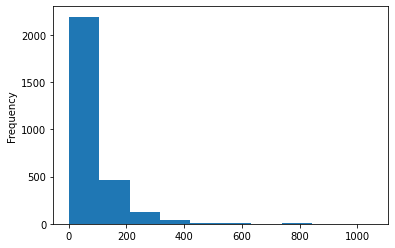

In [ ]:
real_estate_sales['DOM'].plot.hist()

Well...... It's highly "right" skewed... We might want to also run a parallel analysis based on the median to not be influenced by outliers on the higher end.  So I'll make a new column for *below_median_DOM*:

In [ ]:
median_days = real_estate_sales['DOM'].median()
print(f"The median time to sell a house: {round(median_days,1)} days.")

The median time to sell a house: 40.0 days.


In [ ]:
def DOM_check2(row):
  if row['DOM'] < median_days:
    return 1
  else:
    return 0

real_estate_sales['below_median_DOM'] = real_estate_sales.apply(DOM_check2,axis='columns')
real_estate_sales['below_median_DOM'].value_counts(dropna=False)

0    1421
1    1420
Name: below_median_DOM, dtype: int64

Now let's look at the *Pool Description* column:

In [ ]:
real_estate_sales['Pool Description'].unique()

array(['None', 'In Ground', 'Neighborhood', 'Above Ground'], dtype=object)

Ok we don't want neighborhood pools, we're specifically interested in *In Ground* pools.  
> Finally, let's find out the probabilities we seek!

## Probability  Calculation:
This isn't the best way to assess the situation, but it illustrates how you could answer the question posed above.

First we should calculate each conditional probability, then we'll combine them:

In [ ]:
print("Probability of an above-average sale:")

above_average_sale = real_estate_sales['above_avg_price'].sum()
total_sales = real_estate_sales['above_avg_price'].count()

prob_sales = above_average_sale/total_sales

print(round(prob_sales,4))

Probability of an above-average sale:
0.4396


In [ ]:
print("Probability of below-average DOM:")

below_avg_DOM = real_estate_sales['below_avg_DOM'].sum()

prob_DOM = below_avg_DOM/total_sales

print(round(prob_DOM,4))

Probability of below-average DOM:
0.654


In [ ]:
print("Probability of below-median DOM:")

below_median_DOM = real_estate_sales['below_median_DOM'].sum()

prob_DOM2 = below_median_DOM/total_sales

print(round(prob_DOM2,4))
#### 50% as expected of course:

Probability of below-median DOM:
0.4998


In [ ]:
print("Probability of having a pool:")

pool = real_estate_sales[real_estate_sales['Pool Description'] == 'In Ground']['Pool Description'].count()

prob_pool = pool/total_sales

print(round(prob_pool,4))

Probability of having a pool:
0.3288


### **Combining DOM & Sales Probabilities**


In [ ]:
print("Probability of below-average DOM and above-average sale price:")

combined1 = prob_DOM * prob_sales
print(combined1)

Probability of below-average DOM and above-average sale price:
0.2875184248943879


### **Answer:** *Probability of below-average DOM and above-average sale price given the house has a pool:*

In [ ]:
# Let's test it empirically (because we have the full dataset so we can find the empiral combined probability 
# which differs from just multiplying the individual probabilities together):

pool_DOM_price = real_estate_sales.loc[(real_estate_sales['Pool Description']=='In Ground') & (real_estate_sales['above_avg_price']==1) & (real_estate_sales['below_avg_DOM']==1)]['below_avg_DOM'].count()

In [ ]:
A = pool_DOM_price/total_sales
B = prob_pool
print(A/B)

0.35438972162740895


**Let's take a step back and look at them individually:**  
Probability of higher than avg sale price given pool:

In [ ]:
pool_price = real_estate_sales.loc[(real_estate_sales['Pool Description']=='In Ground') & (real_estate_sales['above_avg_price']==1)]['below_avg_DOM'].count()

A2 = pool_price/total_sales

print(A2/B)

0.4282655246252676


![alt text](https://drive.google.com/uc?id=1V0w9I4Nn20mgy4kh2P8TQIHBwfPaXog3)

And now for DOM:

In [ ]:
pool_DOM = real_estate_sales.loc[(real_estate_sales['Pool Description']=='In Ground') & (real_estate_sales['below_avg_DOM']==1)]['below_avg_DOM'].count()

A3 = pool_DOM/total_sales

print(A3/B)

0.6638115631691648


## **Conclusion:**
It appears having a pool may help you sell the house slightly faster but it doesn't appear to increase the amount you sell it for (it may even decrease).  This needs to be assessed with more sophisticated statistics (multivariate regression) to measure the effect and cancel out the effect of selling fast on the price.

---
# **Counting Number of Possible Outcomes:**  
## Sampling without replacement:  
> n * (n-1) * (n-2) * (n-3) ...  * 1 = n!

How many ways can you watch 10 movies if only watched once: 10!

In [ ]:
def factorial(numb):
  x = 0
  output = 1
  while x < numb:
    output *= numb - x
    x += 1
  return output

print(factorial(10))

3628800


In [ ]:
# alternative code:

def factorial_alternative(numb):
  output = 1
  for each in range(1,numb+1):
    output *= each
  return output

print(factorial_alternative(10))

3628800


## Sampling a Subset
### Combinations: *Order **Doesn't** Matter*

![alt text](https://drive.google.com/uc?id=1Lza8Nw8KQiuvfNy77dTPwRfwuhlgVMLC)

Where k = subset size and n = total set size.

### Permutations: *Order Matters*

![alt text](https://drive.google.com/uc?id=1BQPnftEFYamWy_gPg22uetYNn49t3mkY)

---
# **Discrete Random Variables**
*Discrete* variables only have specific possible values, as opposed to *Continuous* variables that have an infinite number of possible values within a range. 

Obviously when talking about probability and discrete variables:  
The sum of the probabilities of obtaining each possible value add up to 1.

For example: in real_estate_sales, the number of bedrooms and bathroms is a discrete random variable. Let's look at its probability distribution:

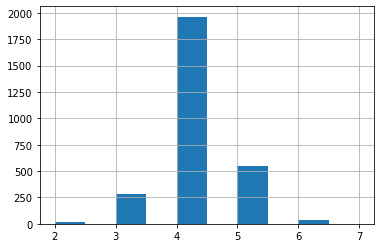

In [ ]:
real_estate_sales['Bedrooms'].hist()

It actually has a somewhat normal distribution, which we'll discuss below.
This is histogram represents the probability distribution.  We can also represent it in code:

In [ ]:
beds_distribution = {}
for each in sorted(real_estate_sales['Bedrooms']):
  if each not in beds_distribution:
    beds_distribution[each] = 1
  else:
    beds_distribution[each] += 1

print(beds_distribution)

{2: 14, 3: 278, 4: 1964, 5: 547, 6: 36, 7: 2}


In [ ]:
for each in range(max(beds_distribution)+1):
  if each in beds_distribution:
    print(f"{each}: {beds_distribution[each]}")

2: 14
3: 278
4: 1964
5: 547
6: 36
7: 2


We can use this to find the mean of the probability distribution (a weighted average):

In [ ]:
mean_of_distribution = 0
for each in beds_distribution:
  prob = beds_distribution[each]/total_sales
  mean_of_distribution += prob*each

print(mean_of_distribution)

4.112284406898979


## **Variance & Standard Deviation**

![alt text](https://drive.google.com/uc?id=18QB4ZBsbbON9bvMTpwRiqBy5pjb2hK7-)  

The variance is the stdev squared.  It's the sum of all the squared distances of each point away from the mean of the probability distribution multipled by the probability of attaining each value (as given by the distribution).

Let's calculated it for the beds distribution above:

In [ ]:
variance = 0
for each in beds_distribution:
  squared_distance = (each - mean_of_distribution )**2
  prob_of_value = beds_distribution[each]/total_sales
  variance += squared_distance*prob_of_value
print(variance**.5)

# Sanity check:
import statistics
print(statistics.stdev(real_estate_sales['Bedrooms']))

0.5954128517182676
0.5955176686985213


We'll discuss standard deviation more but it's a good measure of central tendency.  (It tells you how spread out the data is, which is critical in statistics to compare groups of data points).

---
## **Covariance: Measuring How Two Variables Vary Together**
![Covariance](https://drive.google.com/uc?id=1KBSF_r0smnhDCghXjPvkAmGmL9DVv2Em)  
It's merely the sum of the differences between each data point and the mean of two data sets multiplied together, divided by the size of the sampled population.

> If the Covariance is positive, it means that X and Y are positively correlated to some degree, and if negative vice versa (Cov = 0 : totally independent variables).

### **Example:** *Investment Portfolio*  
Covariance can be very useful for assessing the combined variance of two pools of data mixed together, such as when you are diversifying your investment portfolio to lower overall risk.  Here's the formula to keep track of how much of each investment is in the portfolio, how much they each vary independently, and how much they covary:

![alt text](https://drive.google.com/uc?id=1TFehWYasowLv1kF-lbKzOSHdTSpGD368)


So for example, if your portfolio was made up of 50% stock X with variance of 0.04 and 50% of stock Y with variance of 0.04, even though they have the same variance independently, by investing in both, you lower your risk. 
> This is because even though some factors would affect both stocks, there is also some level of independence so one could remain relatively constant if the other crashes for example.
Let's say the Cov(X,Y) = 0.02.

Therefore:  
![alt text](https://drive.google.com/uc?id=15HAG-Z4Mv5gEb_C8OMUbudYcf6lW2IWU)

So by buying two stocks with equal variance, we ended up with a lower overall variance.  **But note here that the covariance works against you if it's positive (since both stocks may respond equally bad in the face of an adverse event), and it works for you when it's negative (also known as "hedging").** 
This is why index funds are so appealing for large organizations (and anyone who doesn't trust market speculation).

**More than Two Stocks:**
To calculate covariance for more than two variables, you have to use a covariance matrix.  Here is a link showing how such a matrix could be used to figure out the overall variance of a stock portfolio with multiple stocks: https://www.youtube.com/watch?v=uQqUrPjwE-E 

## **Binomial Distribution: Bernoulli**
Used for testing scenarios with only two possible outcomes (win vs. lose, true vs. false, etc.)  There can be a different probability of 1 vs 0.  Each data point is independent and discrete.

**More than Two Variables:**

The mean of the probability distribution is 0\*Prob1 + 1\*Prob2 just like above... So the expected value of *n* iterations is simply n(Prob of success) since the zero cancels out.

The variance is n(Prob)(1-Prob).

The probability mass function allows us to determine the probability of a certain number of successes:
![alt text](https://drive.google.com/uc?id=1OQQcahiOA0-VT0I6TW5xhhH7jKwsx2I8) 


with pi being the probability of success of each independent trial.  Obviously x must be an integer. 
> This formula could be used to help casinos determine the likelihood of a poker player winning a certain number of hands without cheating.  

Let's give it a shot!

### **Example: Dungeons & Dragons**
Let's say you have a D&D character with magic boots that allow him to take flight if he jumps high enough.  He has a 20% chance of taking flight on his turn.  The character gets in a fight that lasts 15 turns.  What's the probability that your character would take flight on 10 of those turns?

x = 10 successes
n = 15 total turns
pi = 0.2 chance of success


In [ ]:
x = 10
n = 15
pi = 0.2

def prob_mass_binomial(x,n,pi):
  numerator = factorial(n)
  denominator = factorial(x)*factorial(n-x)
  prob = pi**x
  complement = (1-pi)**(n-x)
  output = numerator/denominator*prob*complement
  return output

print(f"Unfortunately, the probability of flying for that much of the fight is only: {round(prob_mass_binomial(x,n,pi)*100,2)}%.")
print("Game Over")

Unfortunately, the probability of flying for that much of the fight is only: 0.01%.
Game Over


Lets take a look at the whole distribution of possible x values and their probabilities:

In [ ]:
for each in range(n+1):
  print(f"{each}:   {round(prob_mass_binomial(each,n,pi)*100,2)}%")

0:   3.52%
1:   13.19%
2:   23.09%
3:   25.01%
4:   18.76%
5:   10.32%
6:   4.3%
7:   1.38%
8:   0.35%
9:   0.07%
10:   0.01%
11:   0.0%
12:   0.0%
13:   0.0%
14:   0.0%
15:   0.0%


## **Poisson Distribution**

The Poisson Distribution specifically relates to measuring the number of events within a an interval of time or a region of space.  (For example, the number of people who enter a bar on a Friday night or the number of grains of sand on a beach).  It's very similar to the binomial distribution above except that the variable is not limited to 0 or 1 but could go on to infinity.

> The mean (denoted *mu*) of the Poisson Distribution is actually the same as it's variance.  The mean is also described as the "mean arrival rate," which must be held constant.  (So this can't be used in a situation where the mean rate of the event occurring is changing over time). Also this mean is supposed to be somewhat low (less than 7 supposedly as a rule of thumb).

Below see the relevant formulas:  
![alt text](https://drive.google.com/uc?id=1HPNSPbI2UKUTDvGucAabVZufJhKj5uJY)  


So it's a very easy formula to work with because all you need to know is the mean and the value you're trying to find the probability of (denoted *x*). 

## **Using Poisson with Binomial Random Variables:**
When you have a very large number of trials (denoted *n* in the binomial probability mass function in the previous section), you can't use the binomial equation because it's overwhelming to compute.  [For anything over an n of 100,000, most systems will give you an error....]

What statisticians found is that for a large number of trials, the probability mass function approximates a Poisson distribution.

> To calculate the *mu* variable for Poisson, it's simply:  
mu = n * pi  (n= # of trials, pi = prob. of success in binomial terms)  
**However remember: *mu* should be less than 7 for it to work**

Let's create a function and test it out:


In [ ]:
from math import e

def prob_mass_poisson(mu,x):
  numerator = (mu**x)*(e**(-mu))
  denominator = factorial(x)
  return numerator/denominator


# Let's test out this function side-by-side with the binomial one:
x = 10
n = 200000
pi = .00001  # remember we need a low mu... in this case 
mu = n * pi

print(prob_mass_poisson(mu,x))
print(prob_mass_binomial(x,n,pi))

3.8189850648779595e-05
3.818469524778955e-05


As can be seen they're the same. And the binomial one took a much longer time to compute.

### **Example:** *Ranges of Outcomes*
Sometimes you want to find the probability of a range of outcome values. For example, for the above probability, what if we wanted to find the probability *x* is between 10 and 20 (inclusive)? 

> For a continuous variable, this would involve charting out the probability distribution and taking the integral (area under the curve) for the relevant range within that distribution.  But since we're dealing with a discrete variable, it's simply P(10) + P(11) + P(12) .... P(20).

In [ ]:
p_over_range = 0
for each in range(10,21):
  p_over_range += prob_mass_poisson(mu,each)

print(f"{round(p_over_range,5)}%")

5e-05%


In [ ]:
print("Compared to P(x=10) it's this much larger:")
print(f"{round((p_over_range-prob_mass_poisson(mu,10))/prob_mass_poisson(mu,10),2)*100}%")

Compared to P(x=10) it's this much larger:
22.0%


---
# **Continuous Random Variables**
As mentioned previously, for continuous variables in which there are an infinite number of possible values of *x* we use the area under the curve of the "probability density function."  (It's like a histogram but a curve).  The total area under the curve is always 1 (or 100%).

## **Uniform Probability Distribution**
This is the most straightforward distribution: it assumes there is an equal probability of every occurrence.  
> For example, if you were to choose a completely random number between 1 and 10, including as many decimal places as you wish...  The number could be 3 or 3.043240932840293832 with equal probability.  

The probability distribution graph therefore is simply a rectangle with an area of 1 (so length * height = 1).  
* Height = probability of any given value, 
* Length = the range of possible values.   

The mean of this distribution is just the average between the min and max value.
> So if the range is from 10 to 20, the mean of the distribution is 15.  
Also the median = mean because the probability is uniform across all values.  

The variance is found by the following equation (using a range for *a* to *b*):  
![alt text](https://drive.google.com/uc?id=1XRHD5KJON_Orqqgd6Zkeji-XOjZ6xjWy)

## **Normal Distribution (*Bell-Curve, Gaussian Distribution*)**
The normal distibution involves a more complicated formula but it's the distribution you probably have the most experience with.  That's because a normal distribution occurs in nature and is expected for completely random variables with infinite possible values.  

**Normal distributions are especially important because many of the most common statistical tests work based on the assumption that a data set is relatively normal and not heavily skewed.**  

> To create the distribution, all you need is the mean and stdev.  

The following is the function used to get the curve for the standard deviation:

![Normal Dist Function](https://drive.google.com/uc?id=1gwF7gEvv_gV7hpTkbEr6oVrMv0OJhItU)

***However: it's really important to note that since this is a continuous distribution, the probability of the variable being any exact number in that continuum is actually 0 (since the possibilities are infinite).***  
> Instead, we must find the probability within a range using an area under the curve.

This shows the percentage of the distribution between 1-3 standard deviations from the mean:

![alt text](https://drive.google.com/uc?id=1bvH1wfXR-eJ7W-W_g-aPaXwnw3Qve3mk)  

We often visually inspect an empirical distribution of data in comparison to the expected normal distribution (using mean and stdev of the data) to ensure it seems relatively normal.

### **Using a Normal Distribution with Binomial Random Variables**
We talked previously about how we can use a Poisson distribution for binomial variables as long as the n\*pi is less than 7.  

For cases where it's greater than 15, a normal distribution is more appropriate, and you can still use mu = n\*pi.  You also want to check that n\*(1-pi) is greater than 15.

* So the mean (mu) = n\*pi, and
* The stdev (sigma) = sqrt(mu*(1-pi)) 



### **Z-Scores vs Integrals**
Without computers, it's burdensome to integrate the normal curve function to determine the area under the curve between two points (to find the probability of a value existing between a range of values).  
Therefore, stasticians have always utilized a z-score which allows one to standardize their normal distribution to a normal distribution wtih a mean of 0 and a stdev of 1 (designated a *standardized normal distribution*).

> **Z-score**: To standardize in this way, you just take the minimum and maximum value in the range and work out the z-score by:  
Subtracting the value by the mean and then dividing by the stdev.

Once you have the z-score, you can just look it up  in a big table to find out the probability value for that score.

**Using Integration Instead**: I've been seeing data science presented with Z-scores but I still don't really get why a data scientist armed with python would calculate z just to look it up in a table (albeit digitally) when they can just use the integral which is more direct.

First, let's operationalize the normal curve function and then we can integrate:

In [ ]:
# need to make sure we have the math functions to do sqrt, and to know the real value of pi and euler's number (e):
from math import sqrt
from math import e
from math import pi as pi_


# need to create the function of the normal curve:
def function_normal_curve(x,mu,sigma):
  denominator = sqrt(2*pi_*sigma**2)
  exp_numerator = -(x-mu)**2
  exp_denominator = 2*sigma**2
  exponent = exp_numerator/exp_denominator
  return (e**exponent)/denominator

In [ ]:
# We will use the built-in quad function to calculate the integral:
from scipy.integrate import quad

mu = 10
sigma = 3


# since the quad function only works with one variable, we need to create a little intermediary:
def func_intermediary(x):
  return function_normal_curve(x,mu,sigma)

result = quad(func_intermediary,5,15)

print(result)

(0.9044192954543705, 1.0752580881705017e-13)


The quad function will output a tuple with the integral as the first value and a measurement of error as the second variable.  (There are multiple methods of integration with varying errors associated based on the use case... but for simplicity we'll just focus on the first value):

In [ ]:
print("The probability of selecting a number between 5 and 15 if the mean is 10 and stdev 3 of a normal distribution:")
print(f"{round(result[0],4)*100}%")

The probability of selecting a number between 5 and 15 if the mean is 10 and stdev 3 of a normal distribution:
90.44%


#### **Confirming with Binomial Probability from the Textbook:**
On page 235 (Example 7.6):  
> Suppose that for a large drug company, 30% of drugs undergoing
clinical tests will be approved for the market. Sixty drugs (that are unrelated to
each other) are being tested. What is the probability that less than 20 will be
approved for the market?

We have a binomial function with an *n* of 60 and a *pi* of 0.3.

* n\*pi = 18 (which is greater than 15 so we can use normal distribution to estimate probability)
* n*(1-pi) = 42 (which is also greater than 15 so we're good)
* As mentioned above, stdev = sqrt(mu*(1-pi))

**A**: *Based on the text, the answer should be*: 0.71

Let's set up our variables and solve:

In [ ]:
mu = 18
sigma = sqrt(mu*(1-.3))

def func_intermediary(x):
  return function_normal_curve(x,mu,sigma)

result = quad(func_intermediary,0,20)

print("The probability that less than 20 drugs will be approved:")
print(f"{round(result[0],4)*100}%")


The probability that less than 20 drugs will be approved:
71.34%


And it checks out!

## **Exponential Distribution**
As another type of continuous distribution, the exponential distribution also has a function whose area under the curve = 1 and the probability of a range of values can similarly be solved with an integration.  

However, the formula is also rather straightforward to just find a range.
> The key parameters are *lambda* (the rate of change), and *x* the point in the range you're solving for.

**Note**: This distribution assumes x > 0. 

![exponential](https://drive.google.com/uc?id=1bIZ2HJXKKJ8cJ8eCxhDKVXm6T7Lb21cY)  

What this tells us is the way to find the probability of getting any value between 0 and *x*.  (To get the probability of anything above *x*, simply remove the "1 -" to get the completement of this function).

![alt text](https://drive.google.com/uc?id=1J5nIy580EEpkfebB_J4gBjvQGTbC0tao)

**Also Note**: These are exponential decay functions (like you would use to measure radioactive decay or something decreasing exponentially)... So to make this an exponentially increasing function, just make the exponent positive.

### **Use Cases**
There are many processes that don't follow a linear pattern in the natural world.  (If it did, life would be pretty boring, with everything growing or declining at a set rate indefinitely...  
Here are some examples:

1. **Pandemic Modeling**: One person with the virus may spread it to 3.5 other people on average, with each of those 3-4 people spreading it to 3-4 more people, and the infected population grows exponentially.
2. **Product Adoption**: A handful of early adopters of a product convince 5 other people on average to buy the product and they in turn convince 5 more each, and so on.
3. (well you get the idea).....


**Find probability within a  range of values**:  You can just use the combined probability principle and multiply the two probabilities together:
> For example, if you want to know the probability x is between 5 and 10, just solve for P(x < 10) and P(x > 5) and multiply them together.

